In [2]:
import pickle
import pandas as pd
import numpy as np

In [3]:
from sklearn.metrics import pairwise_distances

In [4]:
ds = pd.read_csv('avatar_tune_ds.csv')
ds.head()

,path,folder,video_type,duration,vcls,gender,sentence,clip,telemetry
0,C9180/videos/talk01.mp4,C9180,talk01,4.56,talk,woman,woman_talk,C9180/clips/talk01.mp4,C9180/telemetry/talk01.pt
1,C9180/videos/talk02.mp4,C9180,talk02,3.80,talk,woman,woman_talk,C9180/clips/talk02.mp4,C9180/telemetry/talk02.pt
2,C9180/videos/talk03.mp4,C9180,talk03,5.16,talk,woman,woman_talk,C9180/clips/talk03.mp4,C9180/telemetry/talk03.pt
3,C9180/videos/talk04.mp4,C9180,talk04,2.08,talk,woman,woman_talk,C9180/clips/talk04.mp4,C9180/telemetry/talk04.pt
4,C9180/videos/talk05.mp4,C9180,talk05,2.40,talk,woman,woman_talk,C9180/clips/talk05.mp4,C9180/telemetry/talk05.pt


In [5]:
ds.columns

Index(['path', 'folder', 'video_type', 'duration', 'vcls', 'gender',
       'sentence', 'clip', 'telemetry'],
      dtype='object')

In [6]:
with open('../train_embs.pickle', 'rb') as f:
    embs_data = pickle.load(f) 
embs_data.keys()

dict_keys(['video_embs', 'imu_embs', 'files'])

In [7]:
len(embs_data['video_embs']), len(embs_data['imu_embs']), len(embs_data['files']), ds.shape

(326, 326, 326, (326, 9))

In [8]:
video_embs = np.vstack(embs_data['video_embs'])
imu_embs = np.vstack(embs_data['imu_embs'])

In [9]:
imu_embs.shape

(326, 1024)

In [22]:
video_files = [i[0] for i in embs_data['files']]

labels_ds = pd.DataFrame()
labels_ds['video_path'] = video_files
labels_ds['clip'] = [i.replace('.datasets/avatar/', '') for i in video_files]

labels_ds = labels_ds.merge(ds, on='clip', how='left')
labels_ds.head()

,video_path,clip,path,folder,video_type,duration,vcls,gender,sentence,telemetry
0,.datasets/avatar/Yao/clips/negative_03.mp4,Yao/clips/negative_03.mp4,Yao/videos/negative_03.mp4,Yao,negative_03,4.48,negative,man,man_negative,Yao/telemetry/negative_03.pt
1,.datasets/avatar/Yao/clips/affirmative_02.mp4,Yao/clips/affirmative_02.mp4,Yao/videos/affirmative_02.mp4,Yao,affirmative_02,4.80,affirmative,man,man_affirmative,Yao/telemetry/affirmative_02.pt
2,.datasets/avatar/Yao/clips/general_04.mp4,Yao/clips/general_04.mp4,Yao/videos/general_04.mp4,Yao,general_04,4.32,general,man,man_general,Yao/telemetry/general_04.pt
3,.datasets/avatar/Yao/clips/general_05.mp4,Yao/clips/general_05.mp4,Yao/videos/general_05.mp4,Yao,general_05,4.20,general,man,man_general,Yao/telemetry/general_05.pt
4,.datasets/avatar/Yao/clips/negative_02.mp4,Yao/clips/negative_02.mp4,Yao/videos/negative_02.mp4,Yao,negative_02,5.04,negative,man,man_negative,Yao/telemetry/negative_02.pt


## Clusters

In [25]:
import umap  # umap-learn==0.5.3
from distinctipy import distinctipy   # distinctipy==1.2.2
import matplotlib.pyplot as plt
import cv2
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Video embeddings

In [30]:
# Video embs

reducer = umap.UMAP(densmap=True)
cords = reducer.fit_transform(video_embs)
_idxs = list(range(len(video_embs)))

labels_ds['x'] = [i[0] for i in cords]
labels_ds['y'] = [i[1] for i in cords]

<Axes: title={'center': 'Actors'}, xlabel='x', ylabel='y'>

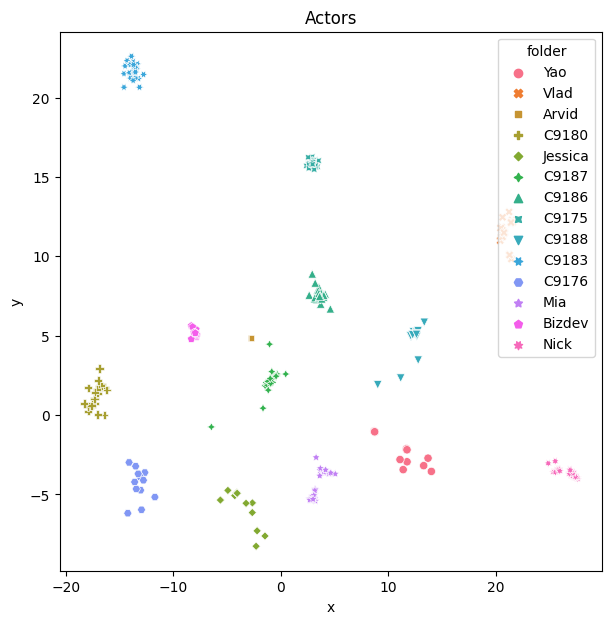

In [32]:
# Actors
fig = plt.figure(figsize=(7, 7))
plt.title('Actors')
sns.scatterplot(labels_ds, x='x', y='y', hue='folder', style='folder')

<Axes: title={'center': 'Actors'}, xlabel='x', ylabel='y'>

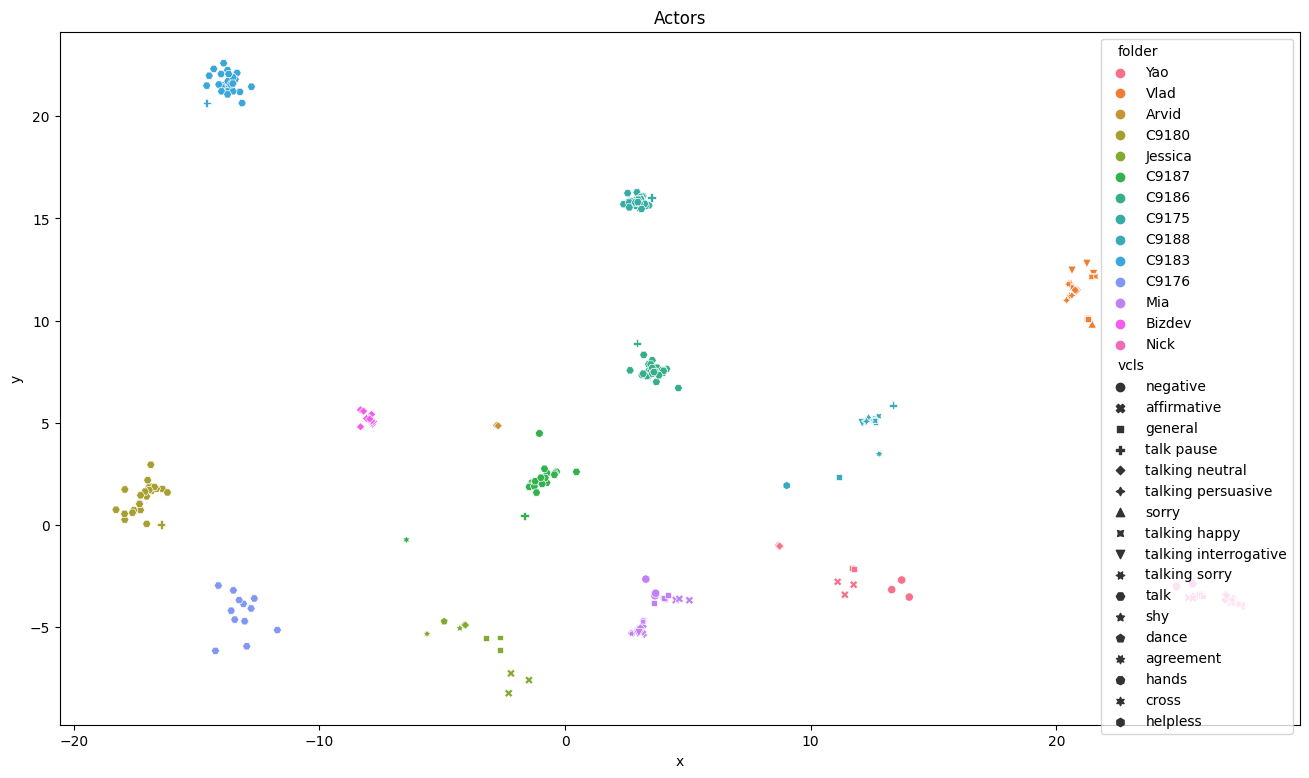

In [45]:
# Video class
fig = plt.figure(figsize=(16, 9))
plt.title('Actors')
sns.scatterplot(labels_ds, x='x', y='y', hue='folder', style='vcls')

<Axes: title={'center': 'gender'}, xlabel='x', ylabel='y'>

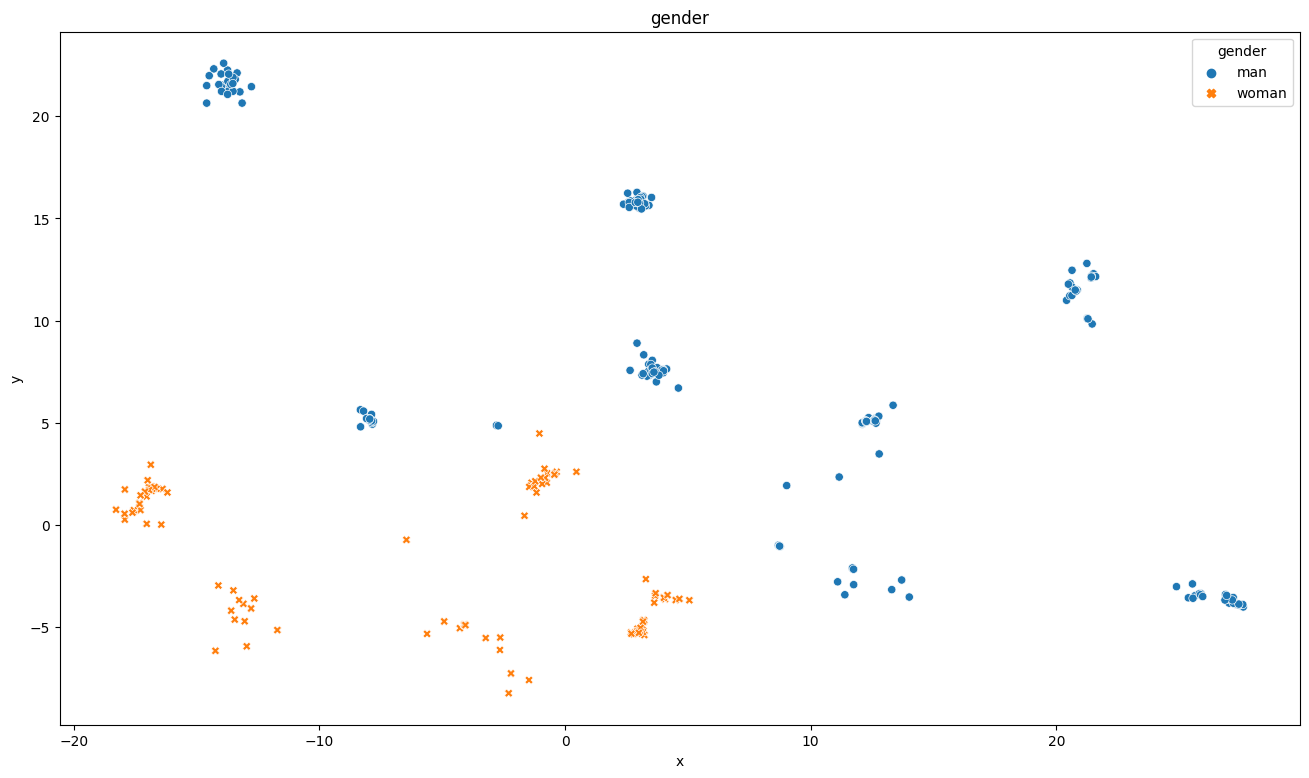

In [53]:
# Gender
fig = plt.figure(figsize=(16, 9))
plt.title('gender')
sns.scatterplot(labels_ds, x='x', y='y', hue='gender', style='gender')

<Axes: title={'center': 'gender'}, xlabel='x', ylabel='y'>

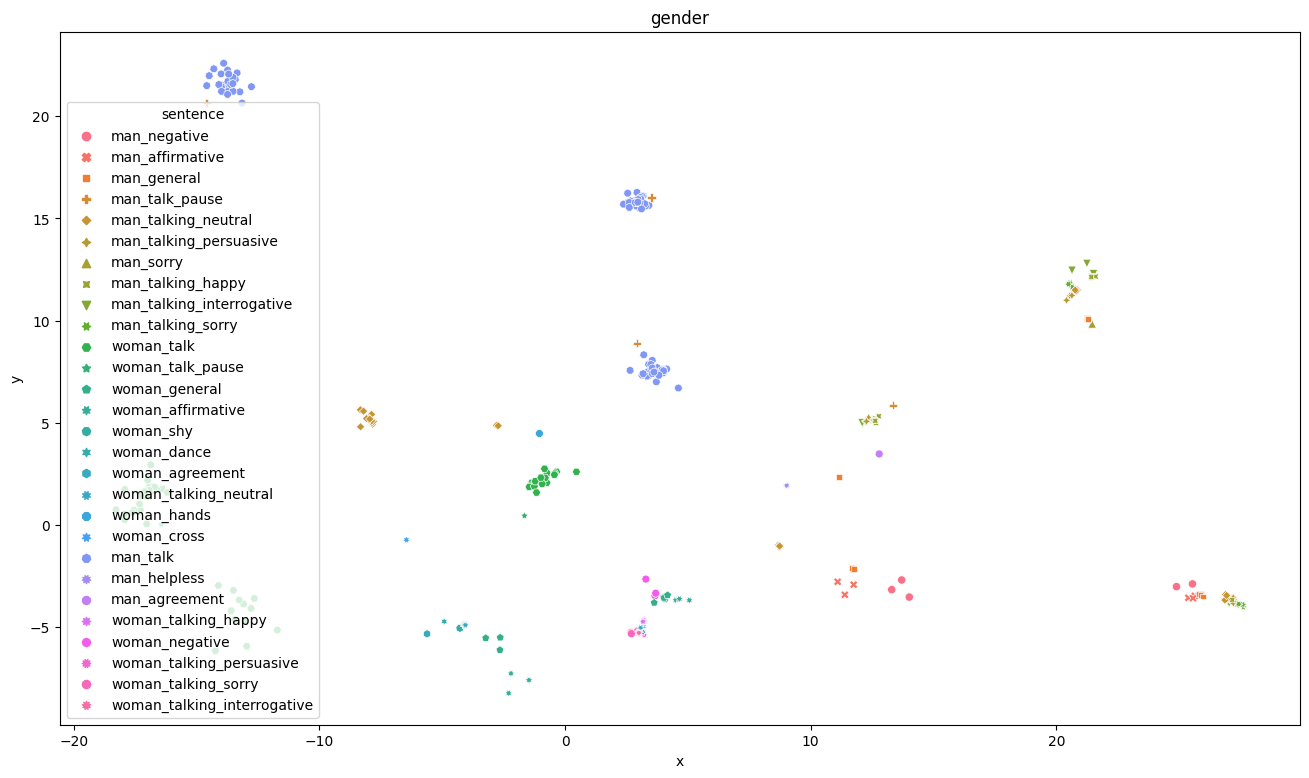

In [54]:
# sentence
fig = plt.figure(figsize=(16, 9))
plt.title('gender')
sns.scatterplot(labels_ds, x='x', y='y', hue='sentence', style='sentence')

### key points embeddings

In [46]:
reducer = umap.UMAP(densmap=True)
cords = reducer.fit_transform(imu_embs)
_idxs = list(range(len(imu_embs)))

labels_ds['imu_x'] = [i[0] for i in cords]
labels_ds['imu_y'] = [i[1] for i in cords]

<Axes: title={'center': 'Actors'}, xlabel='imu_x', ylabel='imu_y'>

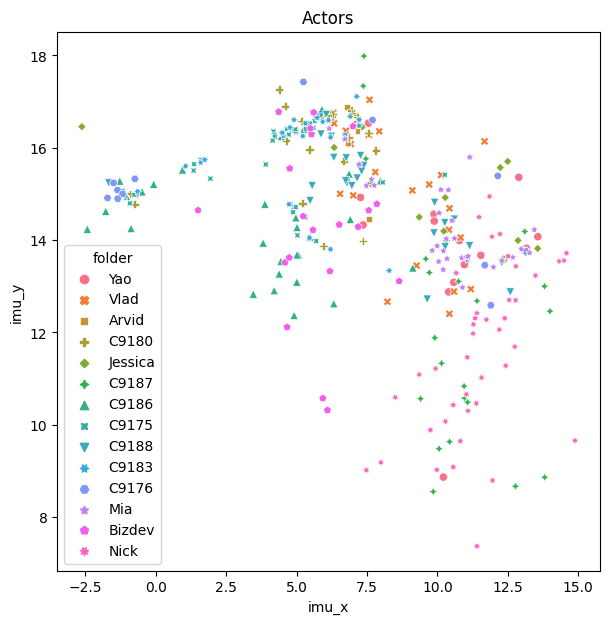

In [48]:
fig = plt.figure(figsize=(7, 7))
plt.title('Actors')
sns.scatterplot(labels_ds, x='imu_x', y='imu_y', hue='folder', style='folder')

<Axes: title={'center': 'Video classes'}, xlabel='imu_x', ylabel='imu_y'>

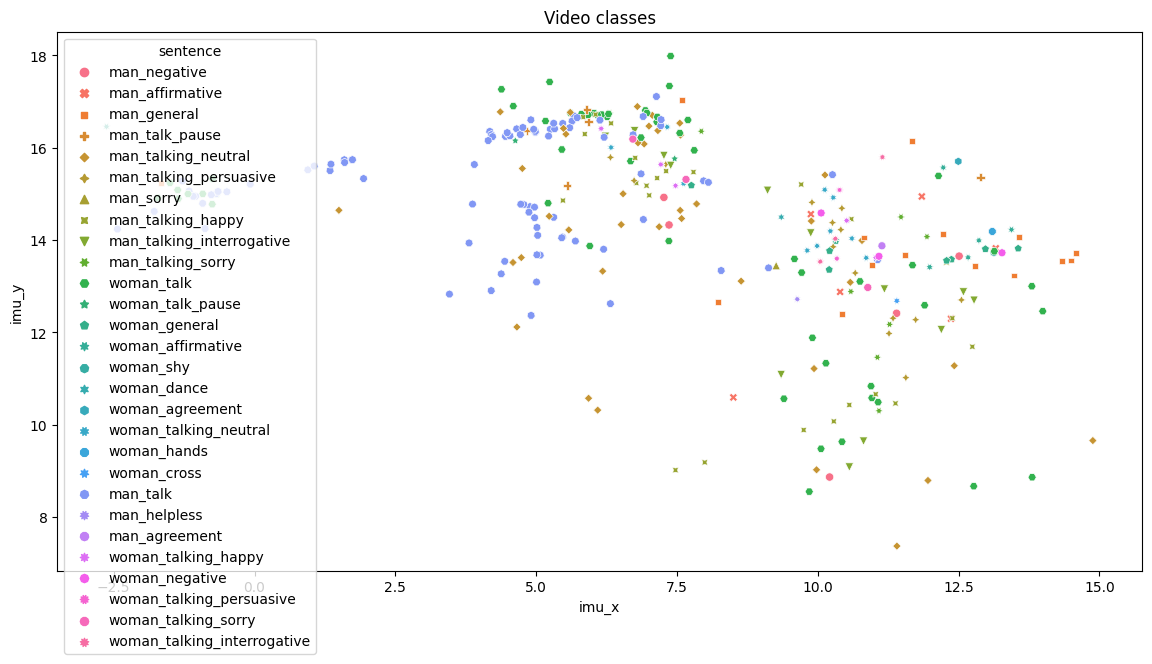

In [51]:
fig = plt.figure(figsize=(14, 7))
plt.title('Video classes')
sns.scatterplot(labels_ds, x='imu_x', y='imu_y', hue='sentence', style='sentence')

<Axes: title={'center': 'Text classes'}, xlabel='imu_x', ylabel='imu_y'>

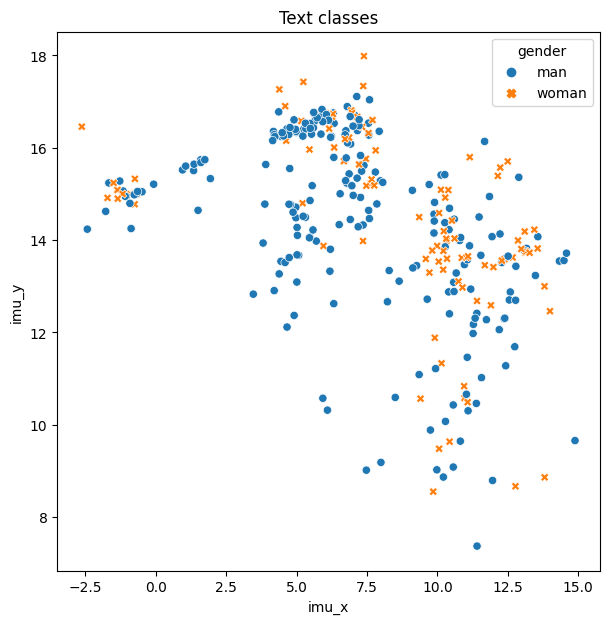

In [52]:
fig = plt.figure(figsize=(7, 7))
plt.title('Text classes')
sns.scatterplot(labels_ds, x='imu_x', y='imu_y', hue='gender', style='gender')

### Check similarity between modalities

In [55]:
labels_ds

,video_path,clip,path,folder,video_type,duration,vcls,gender,sentence,telemetry,x,y,imu_x,imu_y
0,.datasets/avatar/Yao/clips/negative_03.mp4,Yao/clips/negative_03.mp4,Yao/videos/negative_03.mp4,Yao,negative_03,4.48,negative,man,man_negative,Yao/telemetry/negative_03.pt,13.702074,-2.711837,10.209278,8.868514
1,.datasets/avatar/Yao/clips/affirmative_02.mp4,Yao/clips/affirmative_02.mp4,Yao/videos/affirmative_02.mp4,Yao,affirmative_02,4.80,affirmative,man,man_affirmative,Yao/telemetry/affirmative_02.pt,11.748800,-2.940246,13.159550,13.821463
2,.datasets/avatar/Yao/clips/general_04.mp4,Yao/clips/general_04.mp4,Yao/videos/general_04.mp4,Yao,general_04,4.32,general,man,man_general,Yao/telemetry/general_04.pt,11.708042,-2.138809,11.540308,13.670933
3,.datasets/avatar/Yao/clips/general_05.mp4,Yao/clips/general_05.mp4,Yao/videos/general_05.mp4,Yao,general_05,4.20,general,man,man_general,Yao/telemetry/general_05.pt,11.707229,-2.161417,13.564325,14.073831
4,.datasets/avatar/Yao/clips/negative_02.mp4,Yao/clips/negative_02.mp4,Yao/videos/negative_02.mp4,Yao,negative_02,5.04,negative,man,man_negative,Yao/telemetry/negative_02.pt,13.297997,-3.183845,7.359051,14.327868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,.datasets/avatar/Nick/clips/general_06.mp4,Nick/clips/general_06.mp4,Nick/videos/general_06.mp4,Nick,general_06,7.36,general,man,man_general,Nick/telemetry/general_06.pt,25.958797,-3.521926,14.580256,13.716849
322,.datasets/avatar/Nick/clips/talk_sorry_03.mp4,Nick/clips/talk_sorry_03.mp4,Nick/videos/talk_sorry_03.mp4,Nick,talk_sorry_03,12.56,talking sorry,man,man_talking_sorry,Nick/telemetry/talk_sorry_03.pt,27.427788,-3.891594,11.937802,14.074620
323,.datasets/avatar/Nick/clips/talk_happy_08.mp4,Nick/clips/talk_happy_08.mp4,Nick/videos/talk_happy_08.mp4,Nick,talk_happy_08,8.84,talking happy,man,man_talking_happy,Nick/telemetry/talk_happy_08.pt,27.162510,-3.688345,11.379335,10.463280
324,.datasets/avatar/Nick/clips/talk_neutral_04.mp4,Nick/clips/talk_neutral_04.mp4,Nick/videos/talk_neutral_04.mp4,Nick,talk_neutral_04,12.40,talking neutral,man,man_talking_neutral,Nick/telemetry/talk_neutral_04.pt,26.863962,-3.694493,14.882835,9.658424


In [57]:
matrix = pairwise_distances(video_embs, imu_embs, metric='cosine')

In [58]:
matrix.shape

(326, 326)

<Axes: >

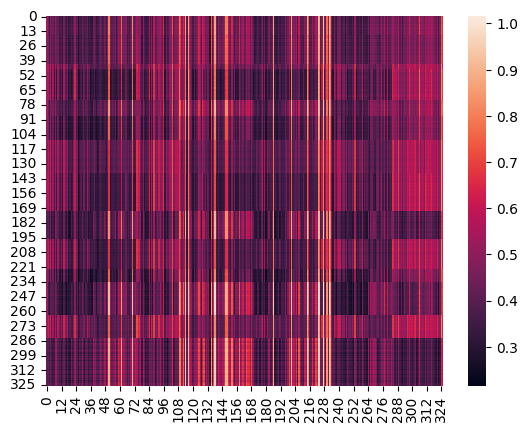

In [59]:
sns.heatmap(matrix)

In [60]:
actor = 'Mia'
actor_df = labels_ds[labels_ds.folder == actor]
actor_df.head()

,video_path,clip,path,folder,video_type,duration,vcls,gender,sentence,telemetry,x,y,imu_x,imu_y
235,.datasets/avatar/Mia/clips/talking_happy_003.mp4,Mia/clips/talking_happy_003.mp4,Mia/videos/talking_happy_003.mp4,Mia,talking_happy_003,10.20,talking happy,woman,woman_talking_happy,Mia/telemetry/talking_happy_003.pt,3.175921,-4.722644,7.213888,15.637638
236,.datasets/avatar/Mia/clips/negative_001.mp4,Mia/clips/negative_001.mp4,Mia/videos/negative_001.mp4,Mia,negative_001,7.56,negative,woman,woman_negative,Mia/telemetry/negative_001.pt,3.660136,-3.483111,13.270050,13.725336
237,.datasets/avatar/Mia/clips/talking_neutral_001...,Mia/clips/talking_neutral_001.mp4,Mia/videos/talking_neutral_001.mp4,Mia,talking_neutral_001,11.04,talking neutral,woman,woman_talking_neutral,Mia/telemetry/talking_neutral_001.pt,3.184211,-4.723132,10.122813,15.090873
238,.datasets/avatar/Mia/clips/general_005.mp4,Mia/clips/general_005.mp4,Mia/videos/general_005.mp4,Mia,general_005,9.64,general,woman,woman_general,Mia/telemetry/general_005.pt,4.068546,-3.649086,10.209930,13.767079
239,.datasets/avatar/Mia/clips/general_004.mp4,Mia/clips/general_004.mp4,Mia/videos/general_004.mp4,Mia,general_004,9.16,general,woman,woman_general,Mia/telemetry/general_004.pt,4.003299,-3.566902,12.286808,13.555432


In [61]:
actor_df.vcls.value_counts()

vcls
talking happy            5
talking neutral          5
general                  5
negative                 3
affirmative              3
talking sorry            3
talking interrogative    3
talking persuasive       2
Name: count, dtype: int64

<Axes: title={'center': 'Mia, video embeddings'}, xlabel='x', ylabel='y'>

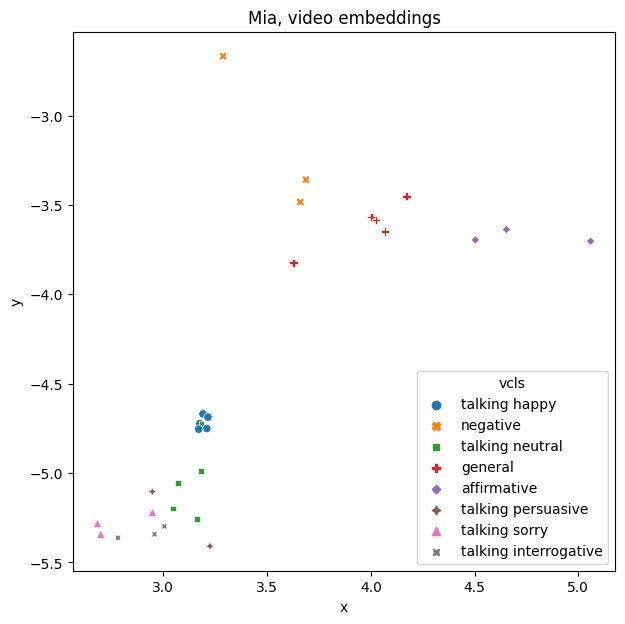

In [64]:
fig = plt.figure(figsize=(7, 7))
plt.title(f'{actor}, video embeddings')
sns.scatterplot(actor_df, x='x', y='y', hue='vcls', style='vcls')

<Axes: title={'center': 'Mia, key points embeddings'}, xlabel='imu_x', ylabel='imu_y'>

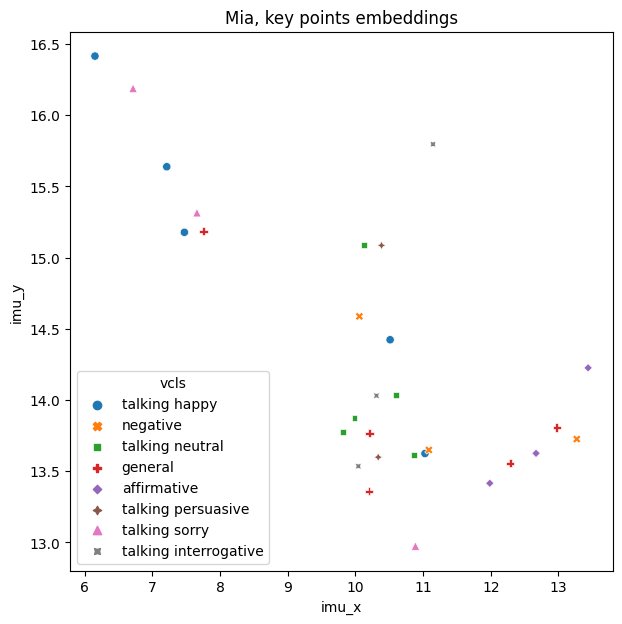

In [63]:
fig = plt.figure(figsize=(7, 7))
plt.title(f'{actor}, key points embeddings')
sns.scatterplot(actor_df, x='imu_x', y='imu_y', hue='vcls', style='vcls')